# Running different algorithms

### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import listdir

### Defining path to data

In [2]:
path = 'C:/Users/izaou/Documents/ML_Project-master/clean_data/'

In [3]:
print(listdir(path))

['complete_gradboost_GENDER.csv', 'complete_logreg_GENDER.csv', 'complete_randforest_GENDER.csv', 'Parameters', 'targets.csv', 'targets_flat.csv', 'test.csv', 'train.csv', 'train_age_only_filled.csv']


### Loading train data

In [4]:
train = pd.read_csv(path + 'train.csv', index_col='user_id')
targets = pd.read_csv(path + 'targets_flat.csv', dtype={"user_id":object, "country_destination":object}, index_col=['user_id'])
targets_train = targets[targets.country_destination.notnull()].values.reshape(-1,)

In [5]:

to_drop= ['age', 'gender__MALE', 'gender__FEMALE', 'gender__OTHER','language__no','signup_method__google','first_affiliate_tracked__local ops','affiliate_provider__naver','affiliate_provider__baidu','affiliate_provider__yandex','language__id','language__hu','affiliate_provider__wayn','language__da','language__tr','language__th','language__fi','date_account_created_hour_sin','language__is','language__is','date_account_created_hour_cos','language__ca','language__cs','affiliate_provider__daum','language__hr','signup_method__weibo']

df1_train = train.drop(to_drop, axis=1)


to_drop1= ['language__no','signup_method__google','first_affiliate_tracked__local ops','affiliate_provider__naver','affiliate_provider__baidu','affiliate_provider__yandex','language__id','language__hu','affiliate_provider__wayn','language__da','language__tr','language__th','language__fi','date_account_created_hour_sin','language__is','language__is','date_account_created_hour_cos','language__ca','language__cs','affiliate_provider__daum','language__hr','signup_method__weibo']

df2_train = train.drop(to_drop1, axis=1)



In [6]:
train_age=pd.read_csv(path +'train_age_only_filled.csv', index_col='user_id')
train_gender=pd.read_csv(path +'complete_gradboost_GENDER.csv', index_col='user_id')
train_age=train_age.astype(np.float)
train_gender=train_gender.astype(np.float)
df_train = pd.concat([df1_train, train_age,train_gender], axis=1, join_axes=[df1_train.index])

In [7]:
df_train = pd.concat([df1_train, train_age,train_gender], axis=1, join_axes=[df1_train.index])

## Predicting classes by taking out age and gender

### Defining the train dataset

### Importing libraries

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import timeit
from sklearn.cross_validation import train_test_split #for splitting data into train and test



C:\Users\izaou\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# XGBoost Tune learning_rate
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot

# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(targets_train)

X_train, X_test, y_train, y_test=train_test_split(df_train,targets_train,test_size=0.2)

### Defining classifiers

In [10]:
# 
from sklearn.preprocessing import LabelEncoder



# encode string class values as integers
y = LabelEncoder().fit_transform(targets_train)
y

array([ 7,  7, 10, ...,  7,  7,  7], dtype=int64)

In [12]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  f1_score
from sklearn.metrics import recall_score

def test_classifier(X_train, y_train, X_test, y_test, classifier):
    print("")
    print("=====================")
    start = timeit.default_timer()
    classifier_name = str(type(classifier).__name__)
    print("Testing " + classifier_name)
    model = classifier.fit(X_train, y_train)
    predictions = model.predict(X_test)
    stop = timeit.default_timer()
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted') 
    recall = recall_score(y_test, predictions, average='weighted')
    
    print("========== Results==========")
    print("Accuracy " + str(accuracy))
    print("F1 score " + str(f1))
    print("recall score " + str(recall))
    print( 'running time:' ,stop - start, 's')
    print("============================")

    return predictions

In [13]:
RF=RandomForestClassifier(n_estimators=10, min_samples_split=2, max_leaf_nodes=9, criterion='entropy',max_depth=10)
pred_RF=test_classifier(X_train, y_train, X_test, y_test, RF)


Testing RandomForestClassifier


C:\Users\izaou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


========== Results==========
Accuracy 0.583565622731
F1 score 0.430103850633
recall score 0.583565622731
('running time:', 3.5397870280735724, 's')


In [42]:
XGB=XGBClassifier(n_estimators=250, learning_rate=0.2, objective='multi:softmax', max_depth=8)
pred_xgb=test_classifier(X_train, y_train, X_test, y_test, XGB)


Testing XGBClassifier
========== Results==========
Accuracy 0.6169215994
F1 score 0.558829194862
recall score 0.6169215994
('running time:', 2573.341389099476, 's')


In [43]:
lr=LogisticRegression()
pred_log=test_classifier(X_train, y_train, X_test, y_test, lr)


Testing LogisticRegression
========== Results==========
Accuracy 0.585416129863
F1 score 0.450212901472
recall score 0.585416129863
('running time:', 99.28125590454783, 's')


In [44]:
tree=DecisionTreeClassifier()
pred_tree=test_classifier(X_train, y_train, X_test, y_test, tree)


Testing DecisionTreeClassifier
========== Results==========
Accuracy 0.476025391769
F1 score 0.48099844369
recall score 0.476025391769
('running time:', 5.1279273142909005, 's')


In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[    0     0     0     0     0     0     0    67     0     0    28     0]
 [    0     0     0     0     0     0     0   185     0     0    98     0]
 [    0     0     0     0     0     0     0   133     0     0    70     1]
 [    0     0     0     0     1     0     1   278     0     0   157     0]
 [    0     0     0     0     0     0     0   679     0     0   306     0]
 [    0     0     0     0     0     0     0   320     0     0   178     1]
 [    0     0     0     0     0     0     1   378     0     0   190     1]
 [    0     0     0     3    10     3     6 21824     0     0  3088     9]
 [    0     0     0     0     1     0     0   100     0     0    61     0]
 [    0     0     0     0     0     0     0    35     0     0    12     0]
 [    1     0     1     1     4     0     2  7934     0     0  4510     9]
 [    0     0     0     1     0     0     0  1358     0     0   643     2]]


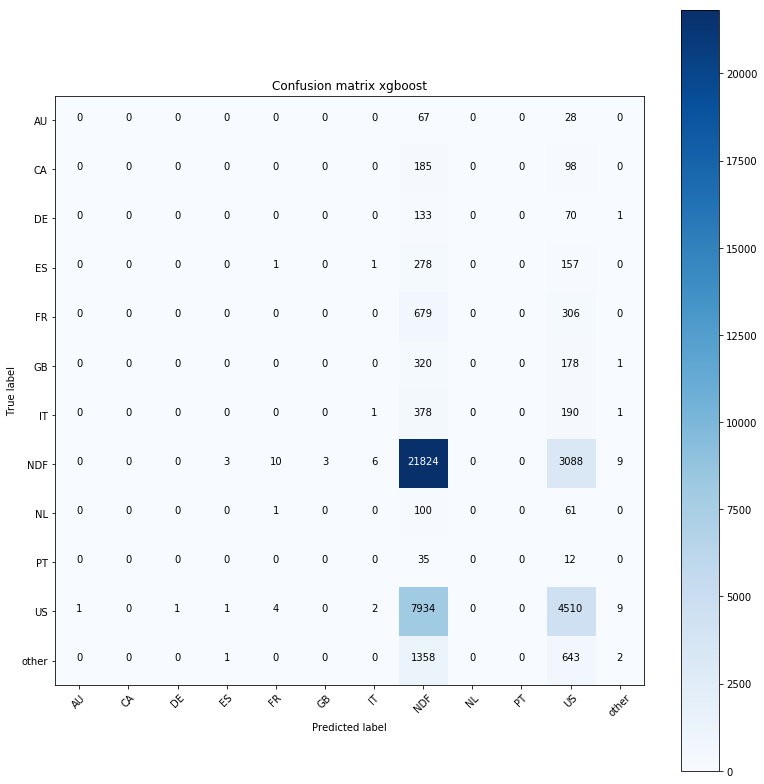

In [46]:
from sklearn.metrics import confusion_matrix
import itertools
class_names=['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US','other']
cnf_matrix=confusion_matrix(y_test,pred_xgb)
plt.figure(figsize=(11,11))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix xgboost')

Confusion matrix, without normalization
[[    0     0     0     0     0     0     0    91     0     0     4     0]
 [    0     0     0     0     0     0     0   268     0     0    15     0]
 [    0     0     0     0     0     0     0   191     0     0    13     0]
 [    0     0     0     0     0     0     0   421     0     0    16     0]
 [    0     0     0     0     0     0     0   949     0     0    36     0]
 [    0     0     0     0     0     0     0   479     0     0    20     0]
 [    0     0     0     0     0     0     0   552     0     0    18     0]
 [    0     0     0     0     0     0     0 24539     0     0   404     0]
 [    0     0     0     0     0     0     0   155     0     0     7     0]
 [    0     0     0     0     0     0     0    47     0     0     0     0]
 [    0     0     0     0     0     0     0 12009     0     0   453     0]
 [    0     0     0     0     0     0     0  1943     0     0    61     0]]


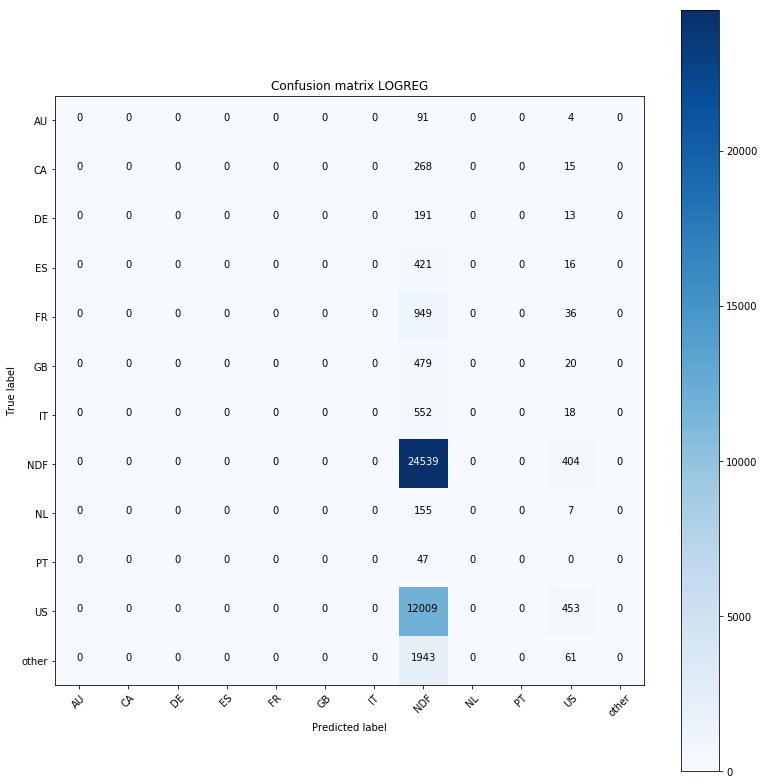

In [47]:
from sklearn.metrics import confusion_matrix
import itertools
class_names=['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US','other']
cnf_matrix=confusion_matrix(y_test,pred_log)
plt.figure(figsize=(11,11))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix LOGREG')

Confusion matrix, without normalization
[[    0     1     0     0     3     3     1    47     1     0    35     4]
 [    0     5     1     3     5     3     5   133     1     0   112    15]
 [    0     0     1     5     9     6     6   100     1     1    60    15]
 [    2     6     2    11    15     7    11   206     2     0   147    28]
 [    3    10    10    19    30    22    18   489     6     0   314    64]
 [    5     7     5    12    19     6    11   230     6     0   168    30]
 [    1     5     4    15    22    10    14   264     3     0   191    41]
 [   55   163   124   270   535   262   298 15653    97    17  6295  1174]
 [    2     0     2     3     6     2     2    74     0     1    61     9]
 [    0     0     0     1     2     0     1    24     0     0    16     3]
 [   53    98   102   171   378   174   187  5961    44    15  4467   812]
 [    3    25    14    24    43    30    35  1019    16     2   658   135]]


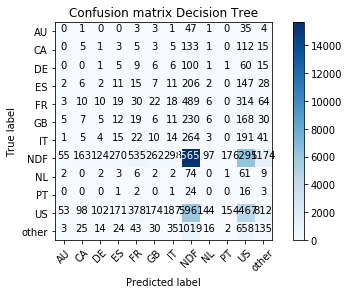

In [48]:
from sklearn.metrics import confusion_matrix
import itertools
class_names=['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US','other']
cnf_matrix=confusion_matrix(y_test,pred_tree)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Decision Tree')

In [ ]:
#XGBoost with train set 1 (age + gender)
X_train, X_test, y_train, y_test=train_test_split(df_train2,targets_train,test_size=0.2)

train['age']=train['age'].np_where() 

XGB=XGBClassifier(n_estimators=250, learning_rate=0.2, objective='multi:softmax', max_depth=8)
predXgb=test_classifier(X_train, y_train, X_test, y_test, XGB)